## 非结构文本数据特征工程操作
从文本数据提取出有意义的特征的一些普遍且有效的策略，提取出的特征极易用来构建机器学习或深度学习模型。

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 文本数据，英文文本数据为例
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',    
          'The quick brown fox jumps over the lazy dog.',    
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans", 
          'I love green eggs, ham, sausages and bacon!',    
          'The brown fox is quick and the blue dog is lazy!',    
          'The sky is very blue and the sky is very beautiful today',    
          'The dog is lazy but the brown fox is quick!' ]    

labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals'] 

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document':corpus,'Category':labels})
corpus_df = corpus_df[['Document','Category']]

In [6]:
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


## 文本预处理
·删除标签:文本中通常会包含一些不必要的内容，比如 HTML 标签，这在分析文本时并没有太多价值<br>
·清理重音字符：将重音字符转换为标准的 ASCII 字符<br>
·扩展缩写：将缩写单词转换为完整的原始形式有助于文本的标准化<br>
·删除特殊字符：特殊字符和非字母数字的符号通常会增加额外噪声<br>
·词干提取和词性还原：可以利用词干创造新的词汇<br>
·去除无用词：在从文本中构建有意义的特征时，没有意义的词被称为无用词<br>

In [30]:
# 单词标点分割
wpt = nltk.WordPunctTokenizer()
# nltk的标准英语无用词表
stop_words = nltk.corpus.stopwords.words('english')
# 对数据进行规整
def normalize_document(doc):
    import re
    # 使用正则化删除特殊字符
    doc = re.sub(r'[^a-zA-Z\s]','',doc,re.I) 
    # 全部改写为小写
    doc = doc.lower()
    # 删除空格
    doc = doc.strip()
    # 单词标点分割
    tokens = wpt.tokenize(doc)
    # 将停词剔除
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)

In [31]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham , bacon , eggs , toast beans',
       'love green eggs ham sausages bacon !',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'],
      dtype='|S57')

## 词袋模型
词袋模型也许是非结构化文本中最简单的向量空间表示模型。向量空间是表示非结构化文本（或其他任何数据）的一种简单数学模型，向量的每个维度都是特定的特征。

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df = 0., max_df = 1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [35]:
# 获取所有词组类型
vocab = cv.get_feature_names()
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## N元词袋模型
N-Gram 是来自文本文档的单词记号的集合，这些记号是连续的，并以序列的形式出现。二元表示阶数为二的 N-Gram，也就是两个单词。

In [38]:
# 二元词袋
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv_matrix.toarray()
# 获取所有词组类型
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF模型
TF-IDF模型在计算中结合了词频和逆文档频率，其在信息检索和 NLP 领域中不可或缺的模型，基于 TF-IDF 的特征向量与原始的词袋模型相比，展示出了缩放和归一化的特性

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0.,max_df=1.,use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix,2),columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


## 文档相似性
使用从词袋模型或者 tf-idf 模型中提取出的特征，基于距离或者相似度度量判断两个文档相似程度的过程。可以用几种相似度和距离度量计算文档相似度。其中包括余弦距离 / 相似度、欧式距离、曼哈顿距离、BM25 相似度、jaccard 距离等

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
# 余弦相似度
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


## 具有相似度的文档聚类
利用一个无监督的层次聚类算法，通过利用我们之前生成的文档相似性特征，将我们的玩具语料库中的类似文档聚合到一起。有两种类型的层次聚类方法，分别是凝聚方法和分裂方法

In [41]:
from scipy.cluster.hierarchy import dendrogram,linkage
Z = linkage(similarity_matrix,'ward')
pd.DataFrame(Z,columns=['Document\Cluster 1','Document\Cluster 2',
                       'Distance','Cluster Size'],dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


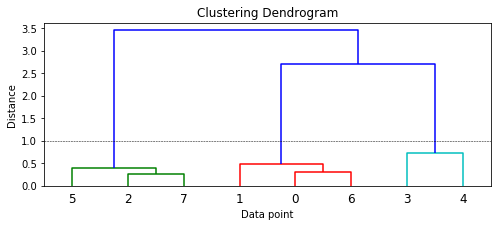

In [42]:
# 将矩阵画成树状图
plt.figure(figsize=(8,3))
plt.title('Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')    
dendrogram(Z) 
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)    

从颜色和树状图的更高层次来看，如果考虑距离度量为 1.0（由虚线表示）或者更小，可以看出模型已经正确识别了三个主要的聚类。利用这个距离，我们可以得到集群的标签

In [43]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0
cluster_labels = fcluster(Z,max_dist,criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels,columns=['ClusterLabel'])
pd.concat([corpus_df,cluster_labels],axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, e...",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beaut...,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## 主题模型
主题模型在总结大量文本来提取和描绘关键概念时非常有用。
隐含狄利克雷分布（Latent Dirichlet Allocation， LDA），它使用了生成概率模型，其中每个文档由几个主题组合而成，每个术语或单词可以分配给某个主题

In [44]:
from sklearn.decomposition import LatentDirichletAllocation
ida = LatentDirichletAllocation(n_topics=3,max_iter=10000,random_state=0)
dt_matrix = ida.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix,columns=['T1','T2','T3'])
features

D:\Program Files\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
D:\Program Files\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054901,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


In [46]:
# 查看主题及其组成部分
tt_matrix = ida.components_
for topic_weights in tt_matrix:
    topic = [(token,weight) for token,weight in zip(vocab,topic_weights)]
    topic = sorted(topic,key = lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print('----------------')

[(u'sky', 4.3324395825632624), (u'blue', 3.3737531748317711), (u'beautiful', 3.3323652405224857), (u'today', 1.3325579841038182), (u'love', 1.3304224288080069)]
----------------
[(u'bacon', 2.3326959484799978), (u'eggs', 2.3326959484799978), (u'ham', 2.3326959484799978), (u'sausages', 2.3326959484799978), (u'love', 1.3354544576019958), (u'beans', 1.3327735253784641), (u'breakfast', 1.3327735253784641), (u'kings', 1.3327735253784641), (u'toast', 1.3327735253784641), (u'green', 1.3325433207547732)]
----------------
[(u'brown', 3.3323474595768783), (u'dog', 3.3323474595768783), (u'fox', 3.3323474595768783), (u'lazy', 3.3323474595768783), (u'quick', 3.3323474595768783), (u'jumps', 1.3324193736202712), (u'blue', 1.2919635624485213)]
----------------


## 使用主题模型特征的文档聚类
在 K-means 聚类法中，有一个输入参数 K，它制定了使用文档特征输出的聚类数量。这种聚类方法是一种基于中心的聚类方法，试图将这些文档聚类为等方差的类

In [47]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels,columns=['ClusterLabel'])
pd.concat([corpus_df,cluster_labels],axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, e...",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beaut...,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1
